# Функции в Pandas

## Домашняя работа

### Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
movie_rating = pd.read_csv('ml-latest-small/ratings.csv')
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
def movie_classifier(row):
    """Классификатор фильмов по рейтингу: 
    оценка 2 и меньше - низкий рейтинг
    оценка 4 и меньше - средний рейтинг
    оценка 4.5 и 5 - высокий рейтинг"""
    if row['rating'] <= 2:
        info = 'низкий рейтинг'
    elif (row['rating'] > 2) and (row['rating'] <= 4):
        info = 'средний рейтинг'
    elif (row['rating'] > 4):
        info = 'высокий рейтинг'
    return info

In [4]:
movie_rating['class'] = movie_rating.apply(movie_classifier, axis=1)
movie_rating.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


### Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток в словаре geo_data.
Результат классификации запишите в отдельный столбец region.

In [5]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [6]:
search_queries = pd.read_csv('keywords.csv')
search_queries.head(10)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195
5,одноклассники моя страница,19976138
6,майл,15144673
7,авито,14786593
8,переводчик,14453469
9,яндекс,13344734


In [7]:
def geo_classifier(row):
    info_region = 'undefined'
    for region, info in geo_data.items():
        for city in info:
            if city in row:
                info_region = region
                return info_region        
    return info_region

In [9]:
search_queries['region'] = search_queries['keyword'].apply(geo_classifier)
search_queries[search_queries.region == 'Центр']

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр
...,...,...,...
98943,вакансии на авито москва от прямых работодателей,3738,Центр
99292,афиша кино москва на сегодня,3704,Центр
99590,авито ярославль автомобили с пробегом,3673,Центр
99890,яндекс метро москва,4548,Центр


### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [10]:
rating_movie = pd.read_csv('ml-latest-small/ratings.csv')
name_movie = pd.read_csv('ml-latest-small/movies.csv')
joined_table = rating_movie.merge(name_movie, on='movieId', how='left')
joined_table.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [12]:
years = list(range(1950, 2011))
years

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [13]:
def production_year(row):
    for element in years:
        if str(element) in row.title:
            year = element
            break
        else:
            year = 1900
    return year

In [14]:
joined_table['year'] = joined_table.apply(production_year, axis=1)

In [15]:
joined_table.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [18]:
result = joined_table.groupby('year').rating.mean().sort_values(ascending=False).to_frame().reset_index()
result.head(20)

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539
5,1974,3.978704
6,1962,3.952446
7,1950,3.915254
8,1977,3.905786
9,1964,3.841492


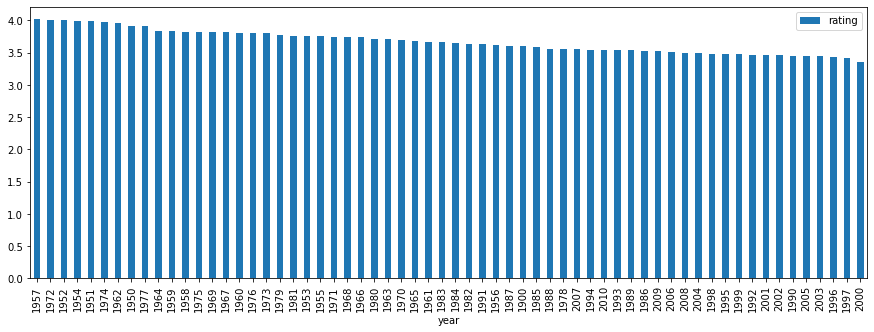

In [20]:
result.plot(x='year',y='rating', kind = 'bar', figsize = (15,5))

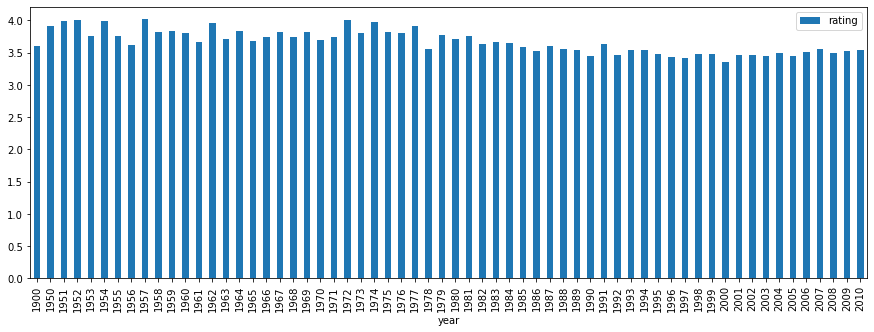

In [21]:
joined_table.groupby('year').rating.mean().to_frame().reset_index().sort_values('year').plot(x='year',y='rating', kind = 'bar', figsize = (15,5))

По гистограммам можно сделать вывод, о том, что  мнение “раньше снимали настоящее кино, не то что сейчас” является верным. 
В период с 1950 по 1978 максимальный средний рейтинг фильмов был близок к 4.0, в том время как в 2000-х годах средний рейтинг близок к 3.5.